<a href="https://colab.research.google.com/github/alandesson/puc-pos-fakenews/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo: Utilizar Métodos de Classficação para Determinar se uma Notícia é Falsa**

**Descrição do Problema**:
O problema consiste em desenvolver um sistema de classificação capaz de detectar se uma notícia é falsa ou verdadeira com base em seu conteúdo. Isso é crucial devido à disseminação de informações enganosas e falsas, especialmente nas mídias sociais e na internet, que podem influenciar negativamente a opinião pública e até mesmo levar a decisões prejudiciais.

**Premissas ou Hipóteses**:

Notícias falsas podem conter linguagem sensacionalista, informações não verificadas, fontes não confiáveis ou discrepâncias com fatos bem estabelecidos.
Por tanto, é possivel criar uma classificador que possa ser utilizado para sinalizar se uma nóticia pode ser falsa.

**Descrição do Dataset**:

O dataset contém atributos textuais como:

*   Título
*   Corpo do texto
*   Assunto
*   Data

O dataset está dividido em dois CSVs, um para nóticias falsas e outro para nóticias verdadeiras.

Fonte do Dataset:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

**Preparação de Dados:**

O tratamento dos dados será feito utiliznado tecnicas como remoção da pontuação e stopwords e a tokenização e outras técnicas de pré-processamento de texto para padronizar o formato dos dados.

Em seguida será feita a junção dos dois CSVs e em seguida faremos uma randomização e separação dos dados em um conjunto de treinamento e teste. Tomando cuidado para garantir que as classes de notícias falsas e verdadeiras estejam balanceadas no conjunto de treinamento para evitar viés no modelo.


Objetivo: realizar operações de preparação dos dados.

Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.
Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em questão.

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Há algum ajuste inicial para os hiperparâmetros?
O modelo foi devidamente treinado? Foi observado problema de underfitting?
É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?
Avaliação de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

Selecione as métricas de avaliação condizentes com o problema, justificando.
Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
Os resultados fazem sentido?
Foi observado algum problema de overfitting?
Compare os resultados de diferentes modelos.
Descreva a melhor solução encontrada, justificando.

In [26]:
import pandas as pd

# URL do arquivo CSV no GitHub contendo CSV com Notícias Falsas
url_fake = 'https://raw.githubusercontent.com/alandesson/puc-pos-fakenews/main/datasets/fake.csv'
# URL do arquivo CSV no GitHub contendo CSV com Notícias Verdadeiras
url_real = 'https://raw.githubusercontent.com/alandesson/puc-pos-fakenews/main/datasets/true.csv'

# labels dos atributos do dataset
labels_atributos = ['Titulo','Texto','Assunto','Data']

# Carregando Dados
dados_fake = pd.read_csv(url_fake, skiprows=1, names=labels_atributos)
dados_real = pd.read_csv(url_real, skiprows=1, names=labels_atributos)

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(dados_fake.head())

                                              Titulo  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               Texto Assunto  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                Data  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [27]:
# adcionando uma coluna chamada de Rotulo, onde 0 é para Fake News e 1 para Nóticias Reais
dados_fake['Rotulo'] = 0
dados_real['Rotulo'] = 1

# Concatenando DataFrames em um único Dataframe
dados = pd.concat([dados_fake, dados_real])

print(dados.head())

                                              Titulo  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               Texto Assunto  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                Data  Rotulo  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0  


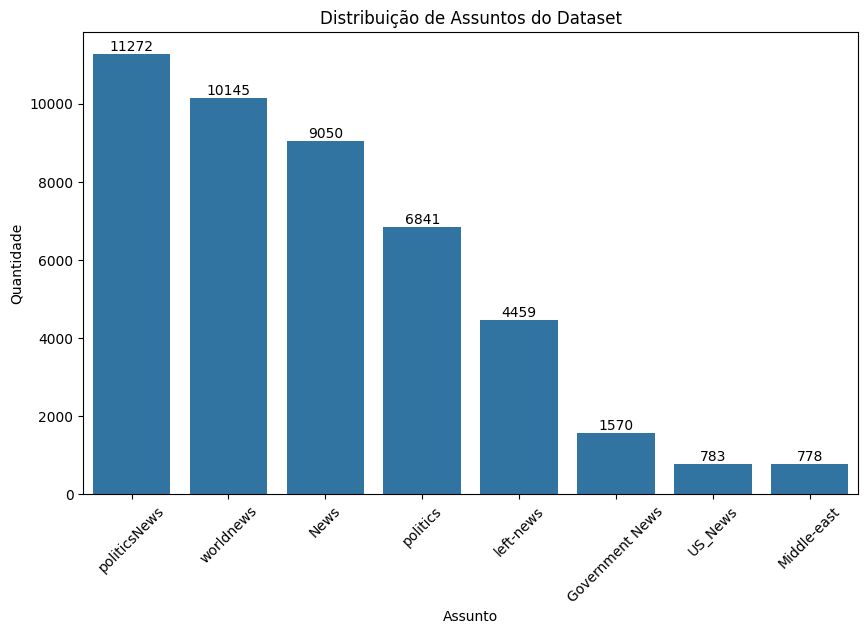

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo a quantidade de nóticias por assunto
qtd_assuntos = dados['Assunto'].value_counts()

# Configurando Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=qtd_assuntos.index, y=qtd_assuntos.values)
plt.title('Distribuição de Assuntos do Dataset')
plt.xlabel('Assunto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Escrevendo Legendas com Valor de Cada Coluna
for index, value in enumerate(qtd_assuntos):
    plt.text(index, value+80, str(value), ha='center')

# Plotando Gráfico
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Quantidade máxima de features ou palavras unicas que serão extraidas do texto
qtd_max_features = 1000

# Fazendo a Vetorização do texto
tfidf_vectorizer = TfidfVectorizer(max_features=qtd_max_features)
X = tfidf_vectorizer.fit_transform(dados['Titulo'] + ' ' + dados['Texto'] + ' ' + dados['Assunto'])
y = dados['Rotulo']

In [31]:


# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do modelo
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Avaliação do modelo
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9388641425389755
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4733
           1       0.93      0.94      0.94      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:


# Construir o modelo
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)